In [63]:
import pandas as pd  
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [64]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [65]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [66]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

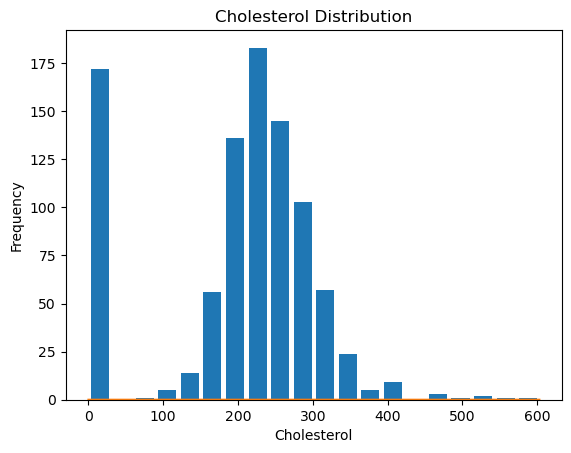

In [67]:
import matplotlib.pyplot as plt  
plt.hist(df.Cholesterol,rwidth=0.8,bins=20)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
from scipy.stats import norm 
import numpy as np  
rng = np.arange(df.Cholesterol.min(),df.Cholesterol.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Cholesterol.mean(),df.Cholesterol.std()))


In [68]:
df.Cholesterol.mean()

198.7995642701525

In [69]:
# zscore not working for this
# df['cz'] = (df.Cholesterol - df.Cholesterol.mean())/df.Cholesterol.std()
# df[(df['cz']>3) | (df['cz']<-3)]

In [70]:
min_threshold,max_threshold = df['Cholesterol'].quantile([0.189,0.979])
min_threshold,max_threshold


(100.0, 380.14499999999737)

In [71]:
df = df.loc[(df['Cholesterol']>=min_threshold)&(df['Cholesterol']<=max_threshold)]

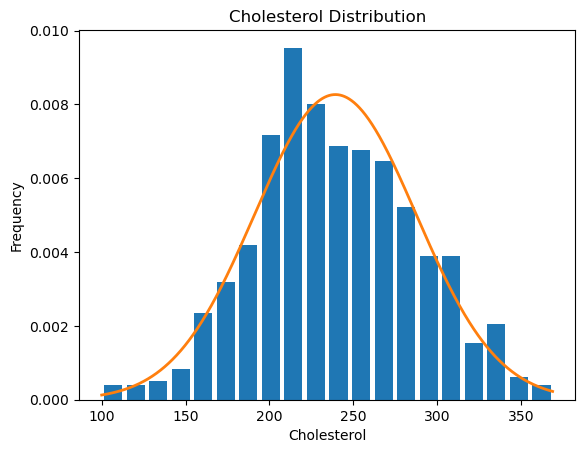

In [72]:
import matplotlib.pyplot as plt  
plt.hist(df.Cholesterol,rwidth=0.8,bins=20,density=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
from scipy.stats import norm 
import numpy as np  
rng = np.arange(df.Cholesterol.min(),df.Cholesterol.max(),0.1)
values = norm.pdf(rng,df.Cholesterol.mean(),df.Cholesterol.std())
plt.plot(rng,values,linewidth=2)

In [73]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,52.851034,132.859310,239.361379,0.164138,140.347586,0.900414,0.474483
std,9.515030,17.260102,48.250659,0.370656,24.602767,1.074446,0.499693
min,28.000000,92.000000,100.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,236.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,273.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,369.000000,1.000000,202.000000,6.200000,1.000000


(array([339.,  30.,  29.,  71.,  41.,  56.,  77.,   9.,  17.,  30.,   3.,
          9.,   1.,   9.,   1.,   0.,   1.,   0.,   1.,   1.]),
 array([-0.1  ,  0.215,  0.53 ,  0.845,  1.16 ,  1.475,  1.79 ,  2.105,
         2.42 ,  2.735,  3.05 ,  3.365,  3.68 ,  3.995,  4.31 ,  4.625,
         4.94 ,  5.255,  5.57 ,  5.885,  6.2  ]),
 <BarContainer object of 20 artists>)

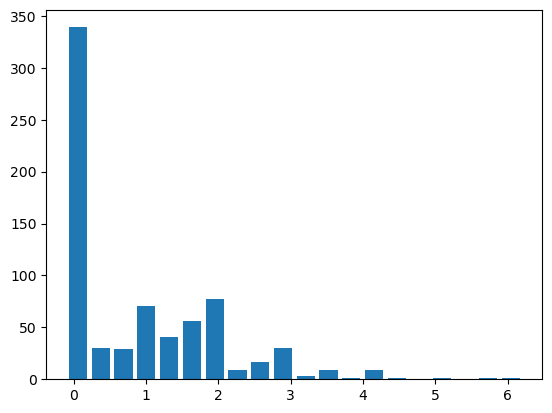

In [74]:
plt.hist(df['Oldpeak'],rwidth=0.8,bins=20)

In [75]:
oldpeak_max = df.Oldpeak.quantile(0.975)
oldpeak_max

3.5

In [76]:
df = df.loc[df.Oldpeak <= oldpeak_max]

(array([310.,  29.,  18.,  26.,   1.,  17.,  68.,  26.,  54.,  12.,  20.,
         61.,   5.,   5.,  11.,   6.,   7.,  24.,   2.,   5.]),
 array([-0.1 ,  0.08,  0.26,  0.44,  0.62,  0.8 ,  0.98,  1.16,  1.34,
         1.52,  1.7 ,  1.88,  2.06,  2.24,  2.42,  2.6 ,  2.78,  2.96,
         3.14,  3.32,  3.5 ]),
 <BarContainer object of 20 artists>)

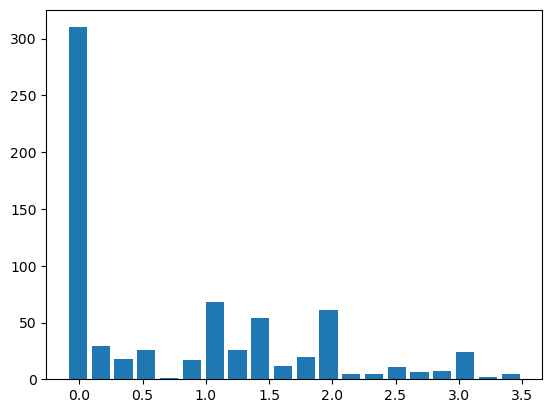

In [77]:
plt.hist(df['Oldpeak'],rwidth=0.8,bins=20)

In [78]:
X = df.drop('HeartDisease',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df.HeartDisease

In [79]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


No scale

In [80]:
from sklearn.model_selection import train_test_split    
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=10)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=5).mean()

0.7773584905660377

Bagging

In [82]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_features=0.8,
    oob_score=True
)
np.mean(cross_val_score(bag,X_train,y_train))

0.8584905660377359

Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train))

0.850943396226415

In [84]:
cls = RandomForestClassifier(n_estimators=150,random_state=42)
cls.fit(X_train,y_train)
cls.score(X_test,y_test)

0.8700564971751412

After scaling

In [85]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y, random_state=10)

In [86]:
np.mean(cross_val_score(bag,X_train,y_train))

0.8490566037735849

In [87]:
np.mean(cross_val_score(RandomForestClassifier(n_estimators=150,random_state=0),X_train,y_train))

0.8603773584905661

In [88]:
cls = RandomForestClassifier(n_estimators=150,random_state=42)
cls.fit(X_train,y_train)
cls.score(X_test,y_test)

0.8757062146892656